<br>

# 이동통신 고객이탈방지를 위한 데이터분석

<br>

                                                                                                                                     전공 : 데이터사이언스
                                                                                                                                     학번 : 201904190
                                                                                                                                     이름 : 김 묘 경

<br>

 ### 1. 데이터 확인 및 전처리 

 ##### 1.1 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>

 ##### 1.2 데이터확인

In [2]:
telco = pd.read_csv('Documents/data/telco.csv')
telco

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


- 불러온 이동통신 데이터를 확인한 결과 총 3333명의 사용자의 데이터와 11가지의 열로 구성되는 것을 확인할 수 있었다.

<br>

In [3]:
telco.info()  #데이터타입, 결측치 확인, 메모리용량 확인.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


-  결측치는 존재하지 않았고, int64와 float64 두개의 데이터 타입으로 이루어져 있으며, 메모리사용량은 대략 287KB를 차지하는 것을 알 수 있었다.

<br>

 ##### 1.3 메모리 용량 줄이기.

In [4]:
telco.describe()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [8]:
# 데이터타입 변경.

telco[['Leave','IsData','NewContract','Callcenter']] = telco[['Leave','IsData','NewContract','Callcenter']].astype(np.int8)
telco[['MemberWeeks','CalCounts']] =telco[['MemberWeeks','CalCounts']].astype(np.int16)
telco[['DataAmount','OverFee','RoamingMin']] =telco[['DataAmount','OverFee','RoamingMin']].astype(np.float16)
telco[['CalMins','MonthlyFee']] =telco[['CalMins','MonthlyFee']].astype(np.float32)
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int8   
 1   MemberWeeks  3333 non-null   int16  
 2   NewContract  3333 non-null   int8   
 3   IsData       3333 non-null   int8   
 4   DataAmount   3333 non-null   float16
 5   Callcenter   3333 non-null   int8   
 6   CalMins      3333 non-null   float32
 7   CalCounts    3333 non-null   int16  
 8   MonthlyFee   3333 non-null   float32
 9   OverFee      3333 non-null   float16
 10  RoamingMin   3333 non-null   float16
dtypes: float16(3), float32(2), int16(2), int8(4)
memory usage: 71.7 KB


In [11]:
round(71.7/286.6,2)

0.25

- 처음과 비교해보았을 때 25%의 메모리만 사용하게 되어 메모리용량을 줄일 수 있게 되었다. 

<br>

 ### 2. 전체 데이터 분석(EDA)

In [12]:
telco.describe()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816895,1.562856,179.775070,100.435644,56.305271,10.054688,10.234375
std,0.352067,39.822106,0.295879,0.447398,1.273438,1.315491,54.467808,20.069084,16.426413,2.535156,2.791016
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.750000,87.000000,45.000000,8.328125,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.375000,101.000000,53.500000,10.070312,10.296875
75%,0.000000,127.000000,1.000000,1.000000,1.780273,2.000000,216.375000,114.000000,66.187500,11.773438,12.101562
max,1.000000,243.000000,1.000000,1.000000,5.398438,9.000000,350.750000,165.000000,111.312500,18.187500,20.000000


Text(0.5, 1.0, '가입기간')

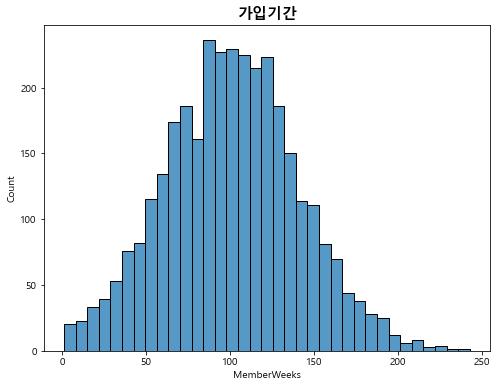

In [15]:
#가입기간 히스토그램으로 확인

fig, ax = plt.subplots(figsize = (8,6))
plt.rc('font', family = 'Malgun Gothic')
sns.histplot(telco.MemberWeeks)
plt.title("가입기간", fontsize = 15, weight = 'bold')

- 가입기간의 평균은 101주였고, 90 ~ 120 정도의 가입기간을 가진 고객이 많은 것으로 보였다.

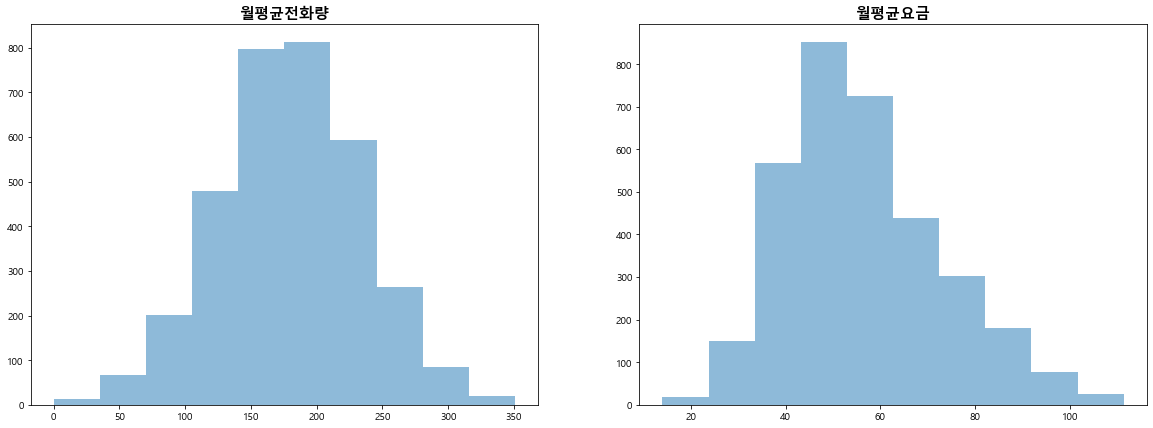

In [16]:
fig = plt.figure(figsize = (20,7))

# 월평균전화량 분포 히스토그램 ( 왼쪽그래프 )
plt.subplot(1,2,1)
plt.hist(telco.CalMins, alpha = 0.5)
plt.title('월평균전화량',fontsize = 15, weight = 'bold' )

#월평균요금 (오른쪽 그래프)
plt.subplot(1,2,2)
plt.title("월평균요금",fontsize = 15, weight = 'bold')
plt.hist(telco.MonthlyFee, alpha = 0.5)

plt.show()

- 월평균전화량의 평균은 179분이였고, 고객 대부분이 월평균 150 ~ 200분 사이에 통화를 많이 하는 것으로 보였다. <br>
- 월평균요금의 평균은 56이였고, 고객 대부분이 50~60 정도의 요금을 많이 지불하는 것으로 보였다. 



<AxesSubplot:xlabel='CalCounts'>

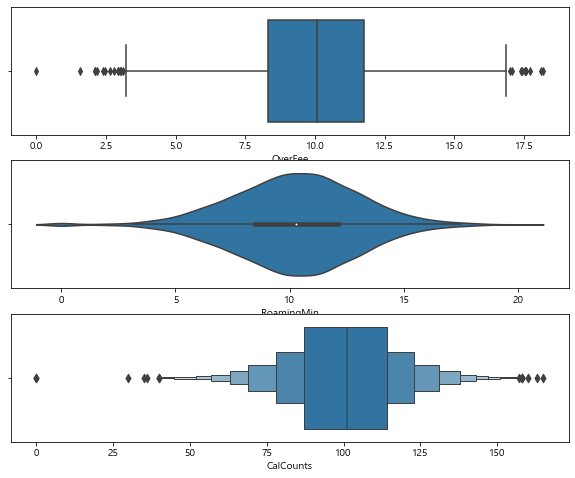

In [17]:
# 초과요금, 로밍시간, 월평균전화수 분포 시각화

fig, axs = plt.subplots(nrows =3, figsize = (10,8))
sns.boxplot(x = telco.OverFee, ax = axs[0])   #초과요금 분포
sns.violinplot(x = telco.RoamingMin, ax = axs[1] )  #로밍시간 분포
sns.boxenplot(x = telco.CalCounts, ax = axs[2] )  #월평균전화수 분포

<br>

C:\Users\82105\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '고객센터전화량')

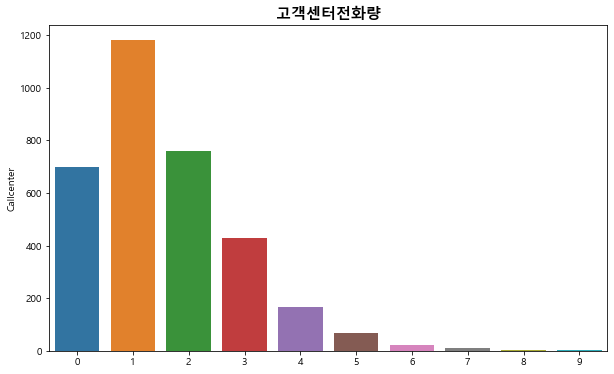

In [19]:
# 고객센터전화량 막대그래프

fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(telco.Callcenter.value_counts().index, telco.Callcenter.value_counts())
plt.title("고객센터전화량", fontsize = 15, weight = 'bold')

- 평균적으로 1.5회 고객센터에 전화를 하며, 대부분 0 ~ 3 정도 고객센터에 전화하는 것으로 나타났다. 

<br>

In [20]:
# 변수간 상관관계 

corr = telco.corr(method = 'pearson')
corr

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
Leave,1.000000,0.016541,-0.259852,-0.102148,-0.087198,0.208750,0.205159,0.018459,0.072323,0.092805,0.068214
MemberWeeks,0.016541,1.000000,-0.024735,0.002918,0.014392,-0.003796,0.006208,0.038470,0.012596,-0.006743,0.009511
NewContract,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049402,-0.003755,-0.047303,-0.019101,-0.045880
IsData,-0.102148,0.002918,-0.006006,1.000000,0.945983,-0.017824,-0.001676,-0.011086,0.737483,0.021525,-0.001315
DataAmount,-0.087198,0.014392,-0.019223,0.945983,1.000000,-0.021723,0.003189,-0.007962,0.781649,0.019636,0.162746
Callcenter,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013409,-0.018942,-0.028029,-0.012959,-0.009633
CalMins,0.205159,0.006208,-0.049402,-0.001676,0.003189,-0.013409,1.000000,0.006750,0.567981,0.007029,-0.010169
CalCounts,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007953,-0.021427,0.021550
MonthlyFee,0.072323,0.012596,-0.047303,0.737483,0.781649,-0.028029,0.567981,-0.007953,1.000000,0.281783,0.117423
OverFee,0.092805,-0.006743,-0.019101,0.021525,0.019636,-0.012959,0.007029,-0.021427,0.281783,1.000000,-0.011044


C:\Users\82105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82105\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


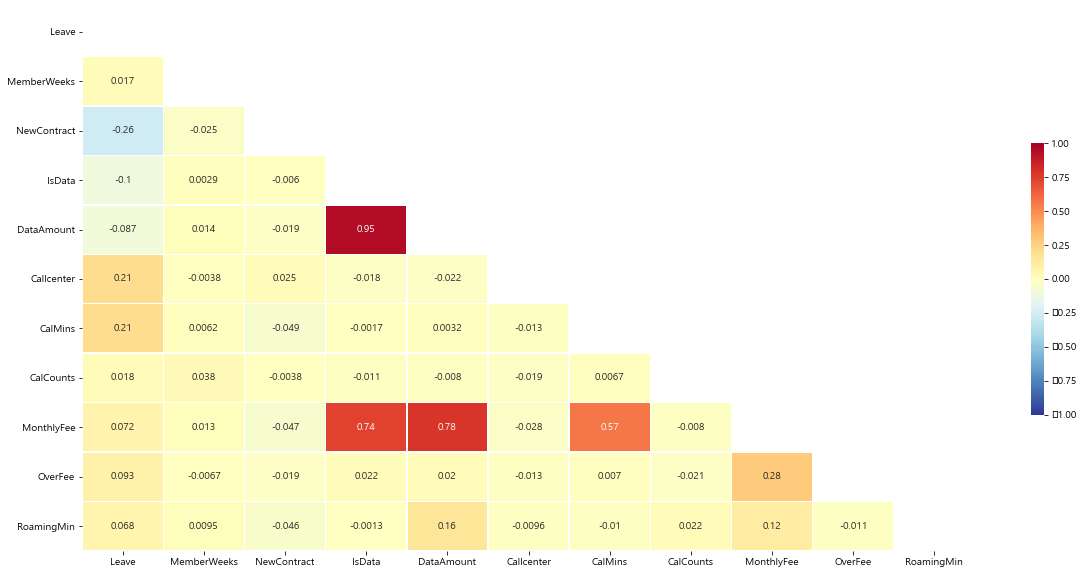

In [21]:
# 상관관계 시각화 하기.

fig, ax = plt.subplots(figsize = (20,10))

mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)]= True

sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 값 표시.
            mask=mask,      # 표시하지 않을 마스크 부분을 지정.
            linewidths=.5,  # 경계면 실선으로 구분.
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

- 변수 간 상관관계를 살펴본 결과, 데이터요금제사용여부와 데이터사용량 사이의 강한 양의 상관관계를 가지는 것으로 보였다.<br>
   또한, 월평균요금은 데이터요금제사용여부, 데이터사용량, 월평균전화량과 양의 상관관계를 가지고 있는 것으로 나타났다.

<br>

### 3. 고객 이탈 방지를 위한 데이터분석

In [22]:
#이동통신 사용자 가입해지여부 인원수로 확인.
telco.Leave.value_counts()  

0    2850
1     483
Name: Leave, dtype: int64

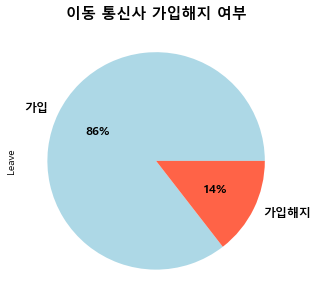

In [23]:
#파이차트 가입해지여부 시각화

fig = plt.figure(figsize = (5,5))
fig.set_facecolor('white')      #그래프 배경 하얀색으로 변경.
plt.rc('font', family = 'Malgun Gothic')
plt.title("이동 통신사 가입해지 여부", fontsize = 15, weight = 'bold')

telco_leave = telco.Leave.value_counts(normalize = True)     # 가입해지여부 비율로 표시
telco_leave.index=['가입','가입해지']        # 인덱스 이름 변경 ( 0 : 가입 1: 가입해지로 변경.) 
telco_leave.plot.pie(autopct = '%2.f%%',
           colors = ['lightblue','tomato'],
           textprops = {'fontsize' : 12,'weight':'bold'})
plt.show()

- 현재 이동통신 사용자 3333 명 중 대부분의 86% (2850명)가 가입상태를 유지하고 있으며, 약 14% (483명)만이 가입 해지 한 것을 확인할 수 있었다.

<br>

In [24]:
# 가입 갱신여부 인원수로 확인.
telco.NewContract.value_counts()

1    3010
0     323
Name: NewContract, dtype: int64

<AxesSubplot:title={'center':'사용자 가입갱신 여부'}, ylabel='NewContract'>

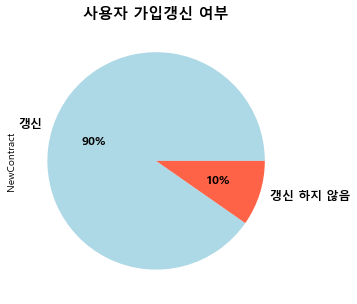

In [25]:
#가입 갱신여부 시각화 

#telco_NewContract = telco.NewContract.value_counts(normalize = True)

fig = plt.figure(figsize = (5,5))
fig.set_facecolor('white')
plt.rc('font', family = 'Malgun Gothic')
plt.title("사용자 가입갱신 여부",fontsize = 15,weight = 'bold')

telco_NewContract =telco.NewContract.value_counts(normalize = True)  #갱신여부 비율로 표현.
telco_NewContract.index=['갱신', '갱신 하지 않음']    # 인덱스 이름변경. (1: 갱신, 0: 갱신 하지 않음.)

telco_NewContract.plot.pie(autopct = '%2.f%%',
                           colors = ['lightblue','tomato'],
                           textprops = {'fontsize' : 12,'weight':'bold'})



- 전체 사용자 3333명 중 대부분의 90% (3010명)가 갱신을 하였고, 약 10% (323명)의 고객이 갱신을 하지 않은 것으로 나타났다.


   
- 가입 해지 여부, 가입갱신 여부, 두가지 범주형 데이터를 통하여
    전체 사용자 86%가 가입을 유지하고, 90%가 이동통신 서비스를 다시 갱신한다는 것을 확인하였다.<br>
    이를 통하여 이 이동통신사는 고객의 이탈이 비교적 적은 것으로 판단된다.

<br>

In [26]:
# 가입 해지여부와 갱신여부 교차표 (명)
pd.crosstab(index = telco.Leave, columns =telco.NewContract, margins = True)

NewContract,0,1,All
Leave,,,
0,186,2664,2850
1,137,346,483
All,323,3010,3333


<AxesSubplot:xlabel='NewContract', ylabel='count'>

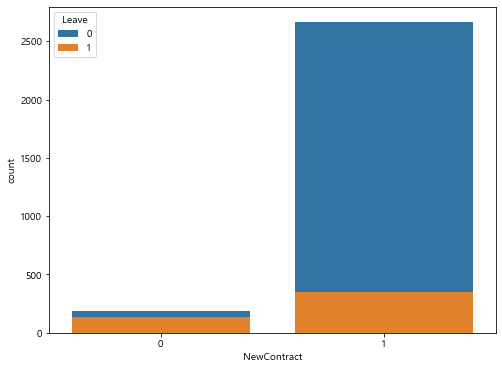

In [27]:
# 사용자 가입여부와 갱신여부 관계 시각화
fig, ax = plt.subplots(figsize = (8,6))
sns.countplot(
        x = 'NewContract',
        hue = 'Leave',
        data = telco,
        dodge = False)

- 가입해지여부와 갱신여부를 같이 살펴본 결과, 갱신을 하고 가입상태를 유지하고 있는 사용자는 2664명으로
    전체 사용자(3333명)의 대략 80%를 차지하고 있었다.<br/>반면, 갱신을 하지 않고 가입해지를 한 사용자수는 137명으로 전체 사용자의 대략 4%로 나타났다.    
    
    
-  갱신여부를 나누어서 가입해지여부를 살펴본 결과, 갱신을 하지 않은 사용자(323명)의 42%가(137명) 가입해지를 하였다.<br>
    반면, 갱신을 한 사용자(3010명)는 11%(346명)만 가입해지를 하였고 대부분의 88%(2664명)의 가입상태를 유지하였다.  
   
    

<br>

In [28]:
# 데이터요금제 사용여부

telco.IsData.value_counts() 

0    2411
1     922
Name: IsData, dtype: int64

<AxesSubplot:title={'center':'데이터요금제 사용여부'}, ylabel='IsData'>

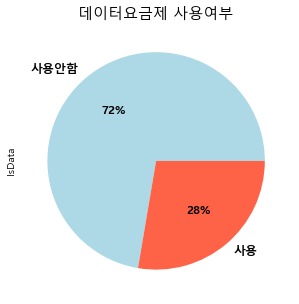

In [29]:
#데이터요금제 사용여부 시각화 

fig = plt.figure(figsize = (5,5))
fig.set_facecolor('white')
plt.rc('font', family = 'Malgun Gothic')
plt.title("데이터요금제 사용여부",fontsize = 15)

telco_IsData =telco.IsData.value_counts(normalize = True)  #데이터요금제 사용여부 비율
telco_IsData.index=['사용안함', '사용']    # 인덱스 이름변경. (1: 사용, 0: 사용안함.)

telco_IsData.plot.pie(autopct = '%2.f%%',
                           colors = ['lightblue','tomato'],
                           textprops = {'fontsize' : 12,'weight':'bold'})



- 데이터 요금제 사용여부를 살펴본 결과, 이동통신 사용자의 대부분의 72% (2411명)가 데이터요금제를 사용하고 있지 않으며,<br> 28%(922명)만이 데이터 요금제를 사용하고 있는 것으로 나타났다.

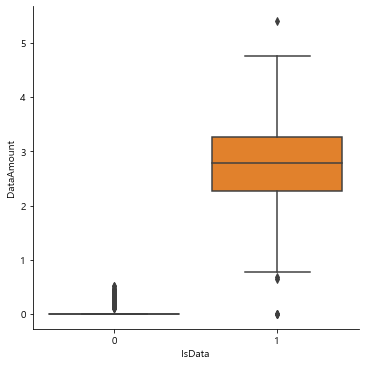

In [30]:
# 데이터 요금제 사용여부에 따른 데이터사용량.

sns.catplot(x = 'IsData', y = 'DataAmount', data = telco, kind = 'box')

- 데이터 요금제 사용여부에 따른 데이터 사용량을 살펴본 결과,<br>데이터 요금제를 사용하는 고객이 데이터요금제를 사용하지 않는 고객보다 훨씬 많은 데이터를 사용하고 있는 것으로 나타났다. 

<br>

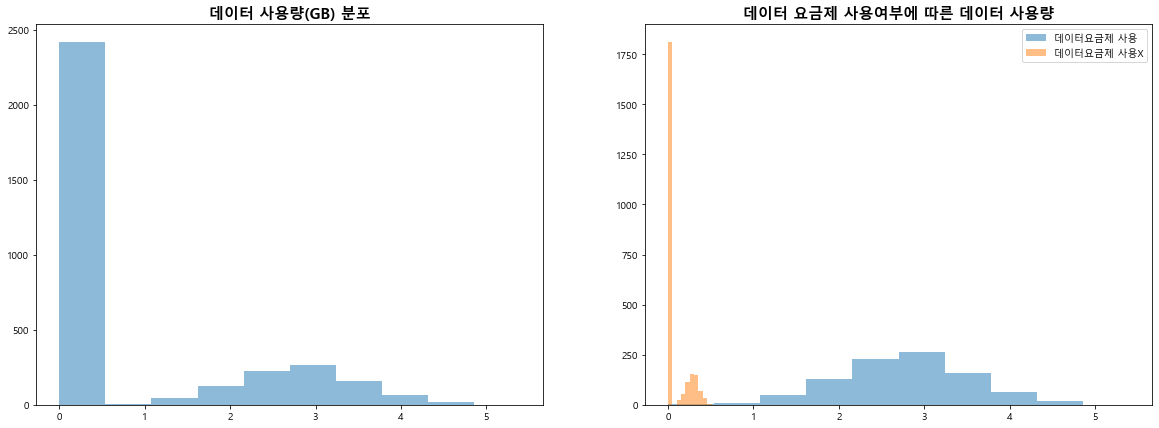

In [31]:
fig = plt.figure(figsize = (20,7))

# 데이터 사용량 분포 히스토그램 ( 왼쪽그래프 )
plt.subplot(1,2,1)
plt.hist(telco.DataAmount, alpha = 0.5, label = '데이터요금제 사용')
plt.title('데이터 사용량(GB) 분포',fontsize = 15, weight = 'bold' )

#데이터 요금제 사용여부에 따른 데이터 사용량 (오른쪽 그래프)
plt.subplot(1,2,2)
plt.title("데이터 요금제 사용여부에 따른 데이터 사용량",fontsize = 15, weight = 'bold')

telco_dataUse = telco[telco.IsData == 1]
plt.hist(telco_dataUse.DataAmount,alpha = 0.5, label = '데이터요금제 사용')

telco_dataNoUse = telco[telco.IsData == 0]
plt.hist(telco_dataNoUse.DataAmount,alpha = 0.5, label = '데이터요금제 사용X')

plt.legend()
plt.show()

- 전체 고객의 데이터 사용량 분포(왼쪽 그래프)를 살펴보면 0 ~ 1 GB 미만의 데이터 사용량이 압도적으로 많았고,<br> 
  1GB 이상을 사용한 고객만을 살펴보았을 때에는  대략 3GB을 평균으로 한 정규분포 모양을 나타냈다.

- 데이터 요금제 사용여부에 따른 데이터 사용량(오른쪽 그래프)을 살펴보면,  1GB 미만을 사용한 고객들은 데이터요금제를 사용하지 않았고 <br>
   1GB 이상을 사용하는 고객들만이 데이터 요금제를 사용하는 것으로 보였다. 

<br>

In [32]:
# 데이터 사용량과 월평균요금 상관관계

telco.DataAmount.corr(telco.MonthlyFee)

0.7816489770089311

- 고객의 데이터 사용량이 많을 수록 월평균요금도 증가하는 양의 상관관계를 가진 것을 확인하였다. 

<br>

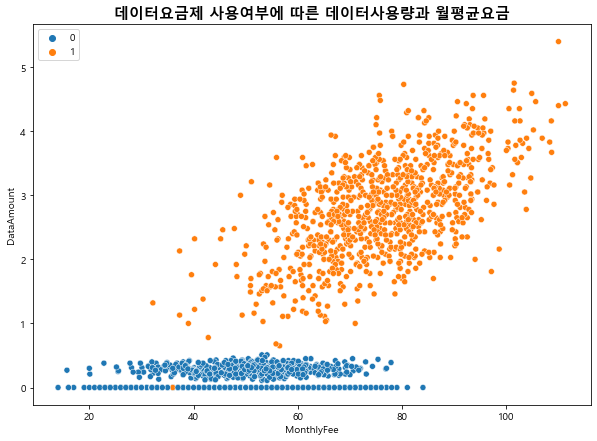

In [33]:
# 데이터요금제 사용여부에 따른 데이터사용량과 월평균요금

fig = plt.figure(figsize = (10,7))
plt.title('데이터요금제 사용여부에 따른 데이터사용량과 월평균요금',fontsize = 15, weight = 'bold' )
sns.scatterplot(x = 'MonthlyFee', y = 'DataAmount',
               hue = 'IsData', data = telco)
plt.legend()
plt.show()

- 데이터 요금제를 사용하는 고객이 데이터 요금제를 사용하지 않는 고객보다 데이터 사용량이 많고 월평균 요금제를 많이 지불하는 것으로 나타났다.

<br>

In [34]:
# 데이터요금제 사용 고객 월평균 요금의 평균
telco_dataUse.MonthlyFee.mean()

75.89205169677734

In [35]:
# 데이터요금제 사용하지 않는 고객 월평균 요금의 평균
telco_dataNoUse.MonthlyFee.mean()

48.81501388549805

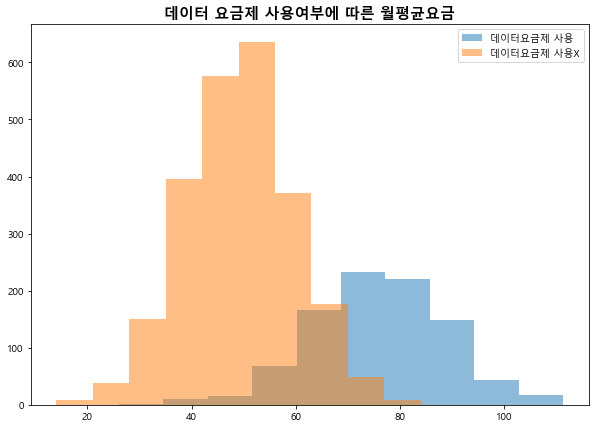

In [36]:
# 데이터 요금제 사용여부에 따른 월평균요금 
fig = plt.figure(figsize = (10,7))
plt.title('데이터 요금제 사용여부에 따른 월평균요금',fontsize = 15, weight = 'bold' )
plt.hist(telco_dataUse.MonthlyFee,alpha = 0.5, label = '데이터요금제 사용')
plt.hist(telco_dataNoUse.MonthlyFee,alpha = 0.5, label = '데이터요금제 사용X')
plt.legend()

- 실제로, 데이터 요금제를 사용하는 고객의 월평균요금의 평균이 약 76인 반면, 데이터의 요금제를 사용하지 않는 고객의 월평균요금의 평균은 49로,<br>
    27정도 차이가 나는 것으로 나타났다.
    

In [37]:
pd.crosstab(index = telco[telco.Leave == 0].Leave, columns =telco.IsData,normalize = True)

IsData,0,1
Leave,,
0,0.704561,0.295439


- 가입자의 70%만이 데이터요금제를 사용하는 것으로 나타났다. 

<br>

### 결론

<br>

 데이터 사용량이 많은 고객들이 데이터요금제를 사용하는지, 데이터요금제를 사용하다보니 데이터 사용량이 많아진 것인지에 대해서는<br>
    현재 데이터로는 알 수 없지만, 가입자의 70% 가 0 ~ 1GB의 데이터를 사용하며 데이터요금제를 사용하지 않는 것으로 나타났다.<br>
   전체 사용자의 86%가 가입을 유지하고, 90%가 이동통신 서비스를 다시 갱신한다는 것을 통하여 비교적 고객의 이탈이 적다고 생각하지만,<br>
   데이터 사용량이 0 ~ 1GB 인 대부분의 가입자를 겨냥한 데이터요금제를 만든다면 고객의 이탈이 줄어들고 가입자가 많아지지 않을 까 생각한다. 
   


<br>